In [ ]:
'UNK'
'unknown'
0
-1
np.nan => NaN
'is_missing'

In [ ]:
df['col1'] = df['col1'].replace('UNK', np.nan)
df['col1'] = df['col1'].replace(0, np.nan)

In [ ]:
# Guassian = Normal (mu, sigma**2)
Standard Normal -> mu = 0, sigma = 1

In [ ]:
mean-value 
variance (x-xi)**2
skewness (x-xi)**3
kurtosis (x-xi)**4

# Anime Rating Case Study

### In the previous case study, we built a linear regression model on a clean version of the anime rating data.

### In this case study, we will introduce the unclean version of the same dataset, go through the steps of cleaning it, and apply transformations to a few columns of the data. This will help us build an improved linear regression model which can predict anime ratings more accurately using transformed versions of features like the number of episodes, the duration of episodes, the number of people who have watched, etc.

## Context

Streamist is a streaming company that streams web series and movies for a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, the number of episodes, duration of an episode, etc.

They are currently focusing on the anime available in their portal, and want to identify the most important factors involved in rating an anime. You as a data scientist at Streamist are tasked with identifying the important factors and building a predictive model to predict the rating on an anime.


## Objective

To preprocess the raw data, analyze it, and build a linear regression model to predict the ratings of anime.


## Key Questions

1. What are the key factors influencing the rating of an anime?
2. Is there a good predictive model for the rating of an anime? What does the performance assessment look like for such a model?


## Data Information

Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

**Data Dictionary**

- title - the title of anime
- mediaType - format of publication
- eps - number of episodes (movies are considered 1 episode)
- duration - duration of an episode
- ongoing - whether it is ongoing
- startYr - year that airing started
- finishYr - year that airing finished
- sznOfRelease - the season of release (Winter, Spring, Fall)
- description - the synopsis of the plot
- studios - studios responsible for creation
- contentWarn - whether anime has a content warning
- watched - number of users that completed it
- watching - number of users that are watching it
- wantWatch - number of users that want to watch it
- dropped - number of users that dropped it before completion
- rating - average user rating
- votes - number of votes that contribute to rating
- tag_<tag/genre> - whether the anime has the certain tag or falls in the certain genre

## Let's start coding!

### Import necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_csv("anime_data_raw.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 14578 rows and 48 columns.


<IPython.core.display.Javascript object>

In [4]:
# let's view a sample of the data
data.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others
13764,Spy Penguin (2013): White Christmas,Web,1.0,2min,False,2013.0,2013.0,NaN,NaN,['Next Media Animation'],0,8.0,0,10,0,NaN,NaN,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3782,A Little Snow Fairy Sugar Summer Specials,TV Special,2.0,NaN,False,2003.0,2003.0,NaN,"One day, when Saga finds an old princess costu...",['J.C. Staff'],0,1056.0,24,576,16,3.449,571.0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2289,Umineko: When They Cry,TV,26.0,NaN,False,2009.0,2009.0,Summer,"In the year 1986, eighteen members of the Ushi...",['Studio Deen'],1,10896.0,1451,8480,1236,3.787,9463.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5081,Unbreakable Machine-Doll Specials,DVD Special,6.0,5min,False,2013.0,2014.0,NaN,NaN,['Lerche'],1,1957.0,201,756,50,3.169,1312.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
9639,Hanako Oku: Hanabi,TV,1.0,6min,False,2015.0,2015.0,NaN,NaN,[],0,46.0,1,54,1,2.166,33.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12608,Tamagotchi Honto no Hanashi,Movie,1.0,20min,False,1997.0,1997.0,NaN,NaN,[],0,11.0,2,18,0,NaN,NaN,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6735,Violinist of Hamelin Movie,Movie,1.0,30min,False,1996.0,1996.0,NaN,"While on their quest to stop the Demon King, t...",['Nippon Animation'],0,247.0,6,167,8,2.826,152.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12846,Neko Kikaku,Movie,1.0,37min,False,2018.0,2018.0,NaN,Nyagoya City is a trendy town where cats live....,['Speed Inc.'],0,12.0,3,102,2,NaN,NaN,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
884,Saint Young Men Movie,Movie,1.0,1hr 30min,False,2013.0,2013.0,NaN,Jesus and Buddha are enjoying their vacation i...,['A-1 Pictures'],0,2726.0,68,2074,37,4.156,1962.0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10524,Delinquent Hamsters / papalion ft. Piso Studio,Web,1.0,2min,False,2017.0,2017.0,Fall,NaN,['Piso Studio'],0,18.0,0,18,0,1.927,10.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

* The `duration` column has values in hours and minutes.
* The `studios` column has a list of values.
* There are a lot of missing values.

In [5]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

In [8]:
df.duplicated(subset=["mediaType", "ongoing"])

0        False
1        False
2         True
3         True
4         True
         ...  
14573     True
14574     True
14575     True
14576     True
14577     True
Length: 14578, dtype: bool

<IPython.core.display.Javascript object>

In [6]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values in the data.

In [9]:
# checking the names of the columns in the data
print(df.columns)

Index(['title', 'mediaType', 'eps', 'duration', 'ongoing', 'startYr',
       'finishYr', 'sznOfRelease', 'description', 'studios', 'contentWarn',
       'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes',
       'tag_'Comedy'', 'tag_'Based on a Manga'', 'tag_'Action'',
       'tag_'Fantasy'', 'tag_'Sci Fi'', 'tag_'Shounen'',
       'tag_'Family Friendly'', 'tag_'Original Work'',
       'tag_'Non-Human Protagonists'', 'tag_'Adventure'',
       'tag_'Short Episodes'', 'tag_'Drama'', 'tag_'Shorts'', 'tag_'Romance'',
       'tag_'School Life'', 'tag_'Slice of Life'', 'tag_'Animal Protagonists'',
       'tag_'Seinen'', 'tag_'Supernatural'', 'tag_'Magic'',
       'tag_'CG Animation'', 'tag_'Mecha'', 'tag_'Ecchi'',
       'tag_'Based on a Light Novel'', 'tag_'Anthropomorphic'',
       'tag_'Superpowers'', 'tag_'Promotional'', 'tag_'Sports'',
       'tag_'Historical'', 'tag_'Vocaloid'', 'tag_Others'],
      dtype='object')


<IPython.core.display.Javascript object>

In [10]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         14578 non-null  object 
 1   mediaType                     14510 non-null  object 
 2   eps                           14219 non-null  float64
 3   duration                      9137 non-null   object 
 4   ongoing                       14578 non-null  bool   
 5   startYr                       14356 non-null  float64
 6   finishYr                      14134 non-null  float64
 7   sznOfRelease                  3767 non-null   object 
 8   description                   8173 non-null   object 
 9   studios                       14578 non-null  object 
 10  contentWarn                   14578 non-null  int64  
 11  watched                       14356 non-null  float64
 12  watching                      14578 non-null  int64  
 13  w

<IPython.core.display.Javascript object>

In [ ]:
df.isna()
df.isnull()
df.notna()

df.dropna()
df.fillna()

In [31]:
df["studios"][0]

"['Bones']"

<IPython.core.display.Javascript object>

* There are many numeric (*float* and *int* type) and string (*object* type) columns in the data.
* Dependent variable is the rating of an anime, which is of *float* type.
* `ongoing` column is of *bool* type.

In [32]:
# checking for missing values in the data.
df.isnull().sum()

title                               0
mediaType                          68
eps                               359
duration                         5441
ongoing                             0
startYr                           222
finishYr                          444
sznOfRelease                    10811
description                      6405
studios                             0
contentWarn                         0
watched                           222
watching                            0
wantWatch                           0
dropped                             0
rating                           2471
votes                            2459
tag_'Comedy'                        0
tag_'Based on a Manga'              0
tag_'Action'                        0
tag_'Fantasy'                       0
tag_'Sci Fi'                        0
tag_'Shounen'                       0
tag_'Family Friendly'               0
tag_'Original Work'                 0
tag_'Non-Human Protagonists'        0
tag_'Adventu

<IPython.core.display.Javascript object>

* There are missing values in many columns.

In [33]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,14578,14578,The Knight in the Area,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,14510,8,TV,4510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,14219,NaN,NaN,NaN,13.5012,62.2622,1,1,1,12,2527
duration,9137,147,4min,964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ongoing,14578,2,False,14356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startYr,14356,NaN,NaN,NaN,2005.46,14.7071,1907,2000,2010,2016,2026
finishYr,14134,NaN,NaN,NaN,2005.52,14.6565,1907,2000,2010,2016,2026
sznOfRelease,3767,4,Spring,1202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,8173,8108,"In 19th century Belgium, in the Flanders count...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studios,14578,864,[],4808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* We can see that the anime ratings vary between 0.844 and 4.702, which suggests that the anime were rated on a scale of 0-5.
* *TV* is the most occurring type of media.
* For anime whose season of release is available, *Spring* is the most common season.
* The number of views for the anime in the data has a very wide range (0 to more than 160,000).

### From the data overview, we see that many columns in the data need to be preprocessed before they can be used for analysis.

## Data Preprocessing

### We will drop the missing values in `rating` column as it is the target variable.

In [37]:
df.dropna(subset=["rating"], inplace=True)
df["rating"].isna().sum()

0

<IPython.core.display.Javascript object>

In [38]:
df.dropna(subset=["rating"], inplace=True)

<IPython.core.display.Javascript object>

In [41]:
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [42]:
# checking missing values in rest of the data
df.isnull().sum()

title                              0
mediaType                         63
eps                                0
duration                        4636
ongoing                            0
startYr                            6
finishYr                         121
sznOfRelease                    8560
description                     4474
studios                            0
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
t

<IPython.core.display.Javascript object>

### Let us look at the entries with no start year.

In [44]:
df["startYr"].value_counts()

2017.0    747
2016.0    725
2014.0    714
2018.0    702
2015.0    666
2013.0    624
2012.0    620
2011.0    536
2019.0    525
2010.0    439
2009.0    421
2006.0    355
2007.0    342
2008.0    336
2005.0    294
2004.0    264
2003.0    239
2002.0    217
2001.0    217
2020.0    183
1999.0    171
1998.0    146
2000.0    141
1993.0    133
1996.0    131
1997.0    129
1992.0    127
1989.0    125
1991.0    124
1994.0    123
1995.0    117
1990.0    111
1987.0    108
1988.0    107
1986.0    106
1985.0     85
1983.0     72
1984.0     70
1981.0     65
1980.0     61
1982.0     61
1979.0     54
1977.0     37
1975.0     35
1978.0     34
1976.0     31
1968.0     27
1969.0     25
1974.0     25
1971.0     24
1973.0     23
1970.0     23
1965.0     21
1972.0     20
1931.0     19
1966.0     18
1967.0     17
1964.0     16
1933.0     14
1932.0     12
1935.0     12
1963.0     12
1934.0     10
1936.0      9
1960.0      7
1930.0      6
1929.0      6
1928.0      6
1961.0      6
1926.0      6
1941.0      5
1959.0

<IPython.core.display.Javascript object>

In [45]:
df[df.startYr.isnull()]

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others
1405,Unbelievable Space Love,Web,10.0,1min,False,NaN,NaN,NaN,NaN,[],0,90.0,16,343,0,4.012,54.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5222,Manbo-P: Irokoizata wa Subete Sakuzu de Kaiket...,Music Video,1.0,5min,False,NaN,NaN,NaN,NaN,[],0,41.0,0,25,0,3.139,20.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9813,Mameshiba: Mamerry Christmas,Other,1.0,1min,False,NaN,NaN,NaN,NaN,[],0,57.0,1,17,0,2.119,35.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10258,Meow no Hoshi,Other,1.0,5min,False,NaN,NaN,NaN,NaN,[],0,40.0,0,25,0,1.999,25.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11970,Landmark,Web,1.0,4min,False,NaN,NaN,NaN,NaN,[],0,34.0,0,9,0,1.256,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12077,Burutabu-chan,Other,3.0,1min,False,NaN,NaN,NaN,NaN,[],0,46.0,1,10,1,1.046,33.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

* We will drop the entries with no start year as this is a difficult column to impute.
* The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [46]:
df.dropna(subset=["startYr"], inplace=True)

# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [47]:
# checking missing values in rest of the data
df.isnull().sum()

title                              0
mediaType                         63
eps                                0
duration                        4636
ongoing                            0
startYr                            0
finishYr                         115
sznOfRelease                    8554
description                     4468
studios                            0
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
t

<IPython.core.display.Javascript object>

### Let us look at the entries with no finish year.

In [48]:
df[df.finishYr.isnull()]

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others
13,Kaguya-sama: Love Is War?,TV,10.0,NaN,True,2020.0,NaN,Spring,The battle between love and pride continues! N...,['A-1 Pictures'],0,NaN,6368,5747,96,4.617,2359.0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
46,Douluo Dalu 2,Web,82.0,22min,True,2018.0,NaN,NaN,Second season of Douluo Dalu.,[],0,NaN,1167,990,32,4.540,549.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
70,Fruits Basket 2nd Season,TV,10.0,NaN,True,2020.0,NaN,Spring,Second season of Fruits Basket.,"['TMS Entertainment', '8 Pan']",0,NaN,4160,4427,55,4.527,1194.0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,Ascendance of a Bookworm: Part II,TV,11.0,NaN,True,2020.0,NaN,Spring,"With her baptism ceremony complete, Myne begin...",['Ajia-do'],0,NaN,3183,1916,29,4.483,1139.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
115,Rakshasa Street 2nd Season,Web,5.0,NaN,True,2019.0,NaN,NaN,NaN,[],0,NaN,47,102,0,4.482,10.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
121,Kingdom 3,TV,4.0,NaN,True,2020.0,NaN,Spring,Third season of Kingdom.,"['Studio Pierrot', 'St. Signpost']",0,NaN,515,740,14,4.476,202.0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
239,One Piece,TV,929.0,NaN,True,1999.0,NaN,Fall,Long ago the infamous Gol D. Roger was the str...,['Toei Animation'],0,NaN,74537,16987,12445,4.402,59737.0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
262,Tower of God,TV,11.0,NaN,True,2020.0,NaN,Spring,Fame. Glory. Power. Anything in your wildest d...,['Telecom Animation Film'],1,NaN,9568,5085,187,4.391,3387.0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
314,Wu Geng Ji 3rd Season,Web,21.0,NaN,True,2019.0,NaN,NaN,Third season of Wu Geng Ji.,[],0,NaN,50,140,1,4.366,19.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
324,A Certain Scientific Railgun T,TV,15.0,NaN,True,2020.0,NaN,Winter,Mikoto Misaka and her friends prepare for the ...,['J.C. Staff'],0,NaN,1825,2939,43,4.365,638.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>

In [49]:
# checking the summary of the data with missing values in finishYr
df[df.finishYr.isnull()].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,115,115,Shironeko Project: Zero Chronicle,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,115,6,TV,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,115,NaN,NaN,NaN,136.522,408.981,1,4.5,10,22,2527
duration,50,18,1min,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ongoing,115,1,True,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startYr,115,NaN,NaN,NaN,2016.52,8.05393,1969,2018,2020,2020,2020
finishYr,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sznOfRelease,75,4,Spring,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,79,79,Joe Gorou lives a carefree life in the small h...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studios,115,66,[],23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* More than 25% of the entries with missing finish year are have started on or after 2018.
* So, we will assume that the anime with missing values in `finishYr` are still airing, and fill the values with 2020 (the year the data was collected).
* You can experiment by dropping the entries where the finish year is missing.
* The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [50]:
df["finishYr"].fillna(2020, inplace=True)

# checking missing values in rest of the data
df.isnull().sum()

title                              0
mediaType                         63
eps                                0
duration                        4636
ongoing                            0
startYr                            0
finishYr                           0
sznOfRelease                    8554
description                     4468
studios                            0
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
t

<IPython.core.display.Javascript object>

* The missing values in `startYr` and `finishYr` columns have been dealt with.
* **We will now create a new variable `years_running`, which will be calculated as `finishYr` minus `startYr`.**
* **We will also drop the `startYr` and `finishYr` columns.**

In [51]:
df["years_running"] = df["finishYr"] - df["startYr"]
df.drop(["startYr", "finishYr"], axis=1, inplace=True)
df.head()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,years_running
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,Spring,The foundation of alchemy is based on the law ...,['Bones'],1,103707.0,14351,25810,2656,4.702,86547.0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,your name.,Movie,1.0,1hr 47min,False,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],0,58831.0,1453,21733,124,4.663,43960.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,A Silent Voice,Movie,1.0,2hr 10min,False,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],1,45892.0,946,17148,132,4.661,33752.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,Fall,"Picking up where the second season ended, the ...",['Production I.G'],0,25134.0,2183,8082,167,4.660,17422.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],1,21308.0,3217,7864,174,4.650,15789.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


<IPython.core.display.Javascript object>

### Let's convert the `duration` column from string to numeric.

In [65]:
60 * float(df["duration"][1].split(" ")[0].replace("hr", "")) + float(
    df["duration"][1].split(" ")[1].replace("min", "")
)

107.0

<IPython.core.display.Javascript object>

In [73]:
# we define a function to convert the duration column to numeric


def time_to_minutes(var):
    if isinstance(var, str):  # checking if the value is string or not
        if "hr" in var:  # checking for the presence of hours in the duration
            spl = var.split(" ")  # splitting the value by space
            hr = (
                float(spl[0].replace("hr", "")) * 60
            )  # taking numeric part and converting hours to minutes
            mt = float(spl[1].replace("min", ""))  # taking numeric part of minutes
            return hr + mt
        else:
            return float(var.replace("min", ""))  # taking numeric part of minutes
    else:
        return np.nan  # will return NaN if value is not string

<IPython.core.display.Javascript object>

In [74]:
# let's apply the function to the duration column and overwrite the column
df["duration"] = df["duration"].apply(time_to_minutes)
df.head()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,years_running
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,Spring,The foundation of alchemy is based on the law ...,['Bones'],1,103707.0,14351,25810,2656,4.702,86547.0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,your name.,Movie,1.0,107.0,False,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],0,58831.0,1453,21733,124,4.663,43960.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,A Silent Voice,Movie,1.0,130.0,False,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],1,45892.0,946,17148,132,4.661,33752.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,Fall,"Picking up where the second season ended, the ...",['Production I.G'],0,25134.0,2183,8082,167,4.660,17422.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],1,21308.0,3217,7864,174,4.650,15789.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


<IPython.core.display.Javascript object>

In [75]:
# let's check the summary of the duration column
df["duration"].describe()

count    7465.000000
mean       24.230141
std        31.468171
min         1.000000
25%         4.000000
50%         8.000000
75%        30.000000
max       163.000000
Name: duration, dtype: float64

<IPython.core.display.Javascript object>

* 50% of the anime in the data have a runtime less than or equal to 8 minutes.


* Some anime even have a runtime of 1 minute.
    - This seems strange at first, but a Google search can reveal that there are indeed such anime.

### We will fill the missing values in the `sznOfRelease` column with '*is_missing*', which will act as a new category.

In [76]:
df["sznOfRelease"].fillna("is_missing", inplace=True)
df.isnull().sum()

title                              0
mediaType                         63
eps                                0
duration                        4636
ongoing                            0
sznOfRelease                       0
description                     4468
studios                            0
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
tag_'Drama'                        0
t

<IPython.core.display.Javascript object>

**Let's check the number of unique values and the number of times they occur for the `mediaType` column.**

In [77]:
df.mediaType.value_counts()

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
Name: mediaType, dtype: int64

<IPython.core.display.Javascript object>

### We will fill the missing values in the `mediaType` column with '*Other*', as the exact values for that category are not known.

In [78]:
df.mediaType.fillna("Other", inplace=True)

# checking the number of unique values and the number of times they occur
df.mediaType.value_counts()

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           643
TV Special      504
Name: mediaType, dtype: int64

<IPython.core.display.Javascript object>

- **We saw that the `studios` column has a list of values.**
- **Let us remove the leading and trailing square braces from the values in the column.**
- **We will also replace the entries with blank lists in these columns with *NaN*.**

In [97]:
df["studios"].sample(20)

4122                                          ['AIC']
10407                                              []
632                               ['Kyoto Animation']
7850                              ['Kokusai Eigasha']
6265                                     ['Passione']
1471                               ['Toei Animation']
6533                                        ['Zexcs']
3364                                    ['Magic Bus']
8529                                          ['JCF']
8806                                               []
68                     ['TMS Entertainment', '8 Pan']
7607                                  ['AIC Classic']
9971                               ['Mook Animation']
8628                                       ['Gallop']
6242                               ['Studio Pierrot']
235                                      ['MADHOUSE']
1405     ['Marza Animation Planet', 'Toei Animation']
10465                                              []
10477                       

<IPython.core.display.Javascript object>

In [98]:
df["studios"] = df["studios"].str.lstrip("[").str.rstrip("]")
df["studios"] = df["studios"].replace(
    "", np.nan
)  # mark as NaN if the value is a blank string

df.head()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,years_running
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,Spring,The foundation of alchemy is based on the law ...,'Bones',1,103707.0,14351,25810,2656,4.702,86547.0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,your name.,Movie,1.0,107.0,False,is_missing,Mitsuha and Taki are two total strangers livin...,'CoMix Wave Films',0,58831.0,1453,21733,124,4.663,43960.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,A Silent Voice,Movie,1.0,130.0,False,is_missing,"After transferring into a new school, a deaf g...",'Kyoto Animation',1,45892.0,946,17148,132,4.661,33752.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,Fall,"Picking up where the second season ended, the ...",'Production I.G',0,25134.0,2183,8082,167,4.660,17422.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,Spring,The battle to retake Wall Maria begins now! Wi...,'Wit Studio',1,21308.0,3217,7864,174,4.650,15789.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


<IPython.core.display.Javascript object>

In [99]:
# checking missing values in rest of the data
df.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                        4636
ongoing                            0
sznOfRelease                       0
description                     4468
studios                         3208
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
tag_'Drama'                        0
t

<IPython.core.display.Javascript object>

### Treating the `studios` column

In [100]:
df.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,years_running
7002,Tales of the Rays: Mirrage Prison,Web,1.0,1.0,False,is_missing,NaN,NaN,0,81.0,3,80,1,2.767,38.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0
11871,Onikiri Shoujo,Web,1.0,1.0,False,is_missing,NaN,NaN,0,44.0,0,25,1,1.359,25.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
7492,Triage X,TV,10.0,NaN,False,Spring,Mochizuki General Hospital boasts some of the ...,'XEBEC',1,4129.0,871,2867,788,2.665,3485.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0
3852,Rainbow Days OVA,OVA,1.0,NaN,False,is_missing,NaN,'Ashi Productions',0,580.0,24,987,8,3.432,291.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4506,Endro~!,TV,12.0,NaN,False,Winter,"In the land of Naral Island, a land of magic a...",'Studio Gokumi',0,1033.0,372,1205,254,3.290,976.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
9863,Heybot!,TV,50.0,NaN,False,Summer,"The story takes place on Screw Island, a screw...",'BN Pictures',0,33.0,14,62,36,2.107,54.0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3513,Unico,Movie,1.0,90.0,False,is_missing,Unico is a special unicorn with the ability to...,'MADHOUSE',0,748.0,7,371,17,3.508,459.0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
10605,Ali Baba to 40-hiki no Touzoku,Movie,1.0,56.0,False,is_missing,"Generations ago, the wily Ali Baba stole a cav...",'Toei Animation',0,305.0,7,99,12,1.897,147.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
10270,rerulili: Girls Talk,Music Video,1.0,4.0,False,is_missing,NaN,NaN,0,18.0,0,5,0,1.995,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0
2942,Majestic Prince Movie: Kakusei no Idenshiko,Movie,1.0,NaN,False,is_missing,NaN,"'Seven Arcs Pictures', 'Orange'",0,261.0,11,423,8,3.634,168.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0


<IPython.core.display.Javascript object>

* We can see that row 2942 has more than one studio, which indicates a collaboration between studios.
* We will split the tags column by ', ' and take all the values in one dataframe for further analysis.

In [108]:
pd.DataFrame(
    df.studios.str.split(", ", expand=True).values.flatten(), columns=["Studios"]
)

,Studios
0,'Bones'
1,None
2,None
3,None
4,None
...,...
84702,None
84703,None
84704,None
84705,None


<IPython.core.display.Javascript object>

In [109]:
studio_df = pd.DataFrame(
    df.studios.str.split(", ", expand=True).values.flatten(), columns=["Studios"]
)
val_c = studio_df.Studios.value_counts()
val_c

'Toei Animation'           636
'Sunrise'                  433
'J.C. Staff'               341
'MADHOUSE'                 339
'TMS Entertainment'        319
                          ... 
'Thundray'                   1
'BigFireBird'                1
'Digital Dream Studios'      1
'Twilight Studio'            1
'Enagio'                     1
Name: Studios, Length: 488, dtype: int64

<IPython.core.display.Javascript object>

* There are too many studios in the data, and adding them all as separate columns will make our data dimension very large.
* We will use a threshold, and keep only those studios with at least as many entries as the threshold.

In [110]:
# we take 100 as threshold
threshold = 100
val_c[val_c.values >= threshold]

'Toei Animation'          636
'Sunrise'                 433
'J.C. Staff'              341
'MADHOUSE'                339
'TMS Entertainment'       319
'Production I.G'          279
'Studio Deen'             266
'Studio Pierrot'          223
'OLM'                     216
'A-1 Pictures'            194
'AIC'                     167
'Shin-Ei Animation'       165
'Tatsunoko Production'    146
'Nippon Animation'        145
'XEBEC'                   143
'DLE'                     134
'GONZO'                   132
'Bones'                   122
'Shaft'                   119
'Kyoto Animation'         108
Name: Studios, dtype: int64

<IPython.core.display.Javascript object>

* 100 looks to be a good threshold.
* We will keep only those studios that have created more than 100 anime, and the rest we will assign as '*Others*'.
* You can experiment by using a different threshold.

In [111]:
# list of studios
studios_list = val_c[val_c.values >= threshold].index.tolist()
print("Studio names taken into consideration:", len(studios_list), studios_list)

Studio names taken into consideration: 20 ["'Toei Animation'", "'Sunrise'", "'J.C. Staff'", "'MADHOUSE'", "'TMS Entertainment'", "'Production I.G'", "'Studio Deen'", "'Studio Pierrot'", "'OLM'", "'A-1 Pictures'", "'AIC'", "'Shin-Ei Animation'", "'Tatsunoko Production'", "'Nippon Animation'", "'XEBEC'", "'DLE'", "'GONZO'", "'Bones'", "'Shaft'", "'Kyoto Animation'"]


<IPython.core.display.Javascript object>

In [112]:
# let us create a copy of our dataframe
df1 = df.copy()

<IPython.core.display.Javascript object>

In [113]:
# first we will fill missing values in the columns by 'Others'
df1.studios.fillna("'Others'", inplace=True)
df1.studios.isnull().sum()

0

<IPython.core.display.Javascript object>

* We will now assign the studio names to the entries.
* We will also create a new variable that will show if collaboration between studios was involved for creating an anime.

In [115]:
i = 0
df1.studios.values[i]

"'Bones'"

<IPython.core.display.Javascript object>

In [116]:
studio_val = []

for i in range(df1.shape[0]):  # iterate over all rows in data
    txt = df1.studios.values[i]  # getting the values in studios column
    flag = 0  # flag variable
    for item in studios_list:  # iterate over the list of studios considered
        if item in txt and flag == 0:  # checking if studio name is in the row
            studio_val.append(item)
            flag = 1
    if flag == 0:  # if the row values is different from the list of studios considered
        studio_val.append("'Others'")

# we will strip the leading and trailing ', and assign the values to a column
df1["studio_primary"] = [item.strip("'") for item in studio_val]
df1.tail()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,years_running,studio_primary
12096,Sore Ike! Anpanman: Kirameke! Ice no Kuni no V...,Movie,1.0,NaN,False,is_missing,Princess Vanilla is a princess in a land of ic...,'TMS Entertainment',0,22.0,1,29,1,2.807,10.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,TMS Entertainment
12097,Hulaing Babies Petit,TV,12.0,5.0,False,Winter,NaN,'Fukushima Gaina',0,13.0,10,77,2,2.090,10.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,Others
12098,Marco & The Galaxy Dragon,OVA,1.0,NaN,False,is_missing,NaN,'Others',0,17.0,0,65,0,2.543,10.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,Others
12099,Xing Chen Bian 2nd Season,Web,3.0,24.0,True,is_missing,Second season of Xing Chen Bian.,'Others',0,NaN,31,22,0,3.941,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,Others
12100,Ultra B: Black Hole kara no Dokusaisha BB!!,Movie,1.0,20.0,False,is_missing,NaN,'Shin-Ei Animation',0,15.0,1,19,1,2.925,10.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,Shin-Ei Animation


<IPython.core.display.Javascript object>

In [118]:
df1.studios.str.split(", ", expand=True)

,0,1,2,3,4,5,6
0,'Bones',None,None,None,None,None,None
1,'CoMix Wave Films',None,None,None,None,None,None
2,'Kyoto Animation',None,None,None,None,None,None
3,'Production I.G',None,None,None,None,None,None
4,'Wit Studio',None,None,None,None,None,None
...,...,...,...,...,...,...,...
12096,'TMS Entertainment',None,None,None,None,None,None
12097,'Fukushima Gaina',None,None,None,None,None,None
12098,'Others',None,None,None,None,None,None
12099,'Others',None,None,None,None,None,None


<IPython.core.display.Javascript object>

In [119]:
# we will create a list defining whether there is a collaboration between studios
# we will check if the second split has None values, which will mean no collaboration between studios
studio_val2 = [
    0 if item is None else 1
    for item in df1.studios.str.split(", ", expand=True).iloc[:, 1]
]

df1["studios_colab"] = studio_val2
df1.tail()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,years_running,studio_primary,studios_colab
12096,Sore Ike! Anpanman: Kirameke! Ice no Kuni no V...,Movie,1.0,NaN,False,is_missing,Princess Vanilla is a princess in a land of ic...,'TMS Entertainment',0,22.0,1,29,1,2.807,10.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,TMS Entertainment,0
12097,Hulaing Babies Petit,TV,12.0,5.0,False,Winter,NaN,'Fukushima Gaina',0,13.0,10,77,2,2.090,10.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,Others,0
12098,Marco & The Galaxy Dragon,OVA,1.0,NaN,False,is_missing,NaN,'Others',0,17.0,0,65,0,2.543,10.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,Others,0
12099,Xing Chen Bian 2nd Season,Web,3.0,24.0,True,is_missing,Second season of Xing Chen Bian.,'Others',0,NaN,31,22,0,3.941,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,Others,0
12100,Ultra B: Black Hole kara no Dokusaisha BB!!,Movie,1.0,20.0,False,is_missing,NaN,'Shin-Ei Animation',0,15.0,1,19,1,2.925,10.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,Shin-Ei Animation,0


<IPython.core.display.Javascript object>

**We will now drop the `studios` column.**

In [120]:
df1.drop("studios", axis=1, inplace=True)

# let's check the data once
df1.head()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,years_running,studio_primary,studios_colab
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,Spring,The foundation of alchemy is based on the law ...,1,103707.0,14351,25810,2656,4.702,86547.0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,Bones,0
1,your name.,Movie,1.0,107.0,False,is_missing,Mitsuha and Taki are two total strangers livin...,0,58831.0,1453,21733,124,4.663,43960.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,Others,0
2,A Silent Voice,Movie,1.0,130.0,False,is_missing,"After transferring into a new school, a deaf g...",1,45892.0,946,17148,132,4.661,33752.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,Kyoto Animation,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,Fall,"Picking up where the second season ended, the ...",0,25134.0,2183,8082,167,4.660,17422.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,Production I.G,0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,Spring,The battle to retake Wall Maria begins now! Wi...,1,21308.0,3217,7864,174,4.650,15789.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,Others,0


<IPython.core.display.Javascript object>

### We have preprocessed the columns with a list of values. We now have the same clean data with which we started the previous session.

**The only change is that we have replaced the '*is_missing*' category in the `studio_primary` columns by '*Others*'.**

### Next, we will impute the missing values in the data.

In [121]:
# checking missing values in rest of the data
df1.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                        4636
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
tag_'Drama'                        0
tag_'Shorts'                       0
t

<IPython.core.display.Javascript object>

### We will fill the missing values in `duration` and `watched` columns by the median values grouped by `studio_primary` and `mediaType`.

In [125]:
df2.groupby(["studio_primary", "mediaType"])[["duration", "watched"]].median()

duration  watched
studio_primary       mediaType                     
A-1 Pictures         DVD Special      24.0   1369.5
                     Movie            98.0   2601.5
                     Music Video       3.0    311.0
                     OVA              24.0   2212.0
                     Other             1.0    155.0
                     TV                NaN   7759.5
                     TV Special       24.5   1427.0
                     Web               2.5    163.5
AIC                  DVD Special      23.0   1986.5
                     Movie            85.0   1525.0
                     OVA              38.0    711.0
                     Other             4.0    930.0
                     TV                NaN   5433.0
                     TV Special        NaN   9474.0
                     Web              10.0    624.0
Bones                DVD Special       5.5   1247.0
                     Movie            95.0   3909.5
                     Music Video       4.5    345.0
                     OVA              24.0   4121.0
                     Other            30.5   4020.5
                     TV                3.0  10661.5
                     TV Special       60.0   1597.5
                     Web               4.0    665.0
DLE                  DVD Special       5.0     55.5
                     Movie            89.0     23.0
                     OVA               2.0     30.0
                     Other             3.0     30.0
                     TV                4.0     27.0
                     TV Special       24.0   1475.0
                     Web               3.0     23.0
GONZO                DVD Special      10.0    429.5
                     Movie            90.0   1616.5
                     Music Video       6.0    263.0
                     OVA              32.0   1705.0
                     Other             7.0    382.0
                     TV                7.0   5818.0
                     TV Special       22.0    582.0
                     Web              13.0    489.0
J.C. Staff           DVD Special      12.0   1793.5
                     Movie            67.0   4293.0
                     Music Video      30.0    112.0
                     OVA              30.0    511.5
                     Other            14.0    724.0
                     TV                7.0   5737.0
                     TV Special       24.0    507.5
                     Web              23.5   4224.0
Kyoto Animation      DVD Special       6.0   2721.0
                     Movie            99.0   2401.5
                     OVA              28.0   4531.0
                     Other             1.0    348.0
                     TV                NaN  23906.5
                     TV Special       12.5   4134.0
                     Web               4.0   3571.5
MADHOUSE             DVD Special      13.0    897.5
                     Movie            90.0    999.0
                     Music Video       6.5   2741.5
                     OVA              32.0   1021.5
                     Other             4.0    718.0
                     TV               13.0   4662.5
                     TV Special       25.0    589.5
                     Web               3.5    193.0
Nippon Animation     DVD Special       6.0    107.5
                     Movie            90.0     72.0
                     OVA              30.0   1351.0
                     Other            43.0     34.5
                     TV                5.0    161.0
                     TV Special       70.0     24.0
                     Web              12.0     72.0
OLM                  DVD Special       7.0    487.0
                     Movie            75.5   2419.0
                     Music Video       5.0    416.0
                     OVA              22.0   1908.0
                     Other            20.0   1500.5
                     TV               12.0    336.0
                     TV Special       23.0   1112.0
                     Web      

<IPython.core.display.Javascript object>

In [122]:
df2 = df1.copy()

df2[["duration", "watched"]] = df2.groupby(["studio_primary", "mediaType"])[
    ["duration", "watched"]
].transform(lambda x: x.fillna(x.median()))

# checking for missing values
df2.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                         155
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                            0
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
tag_'Drama'                        0
tag_'Shorts'                       0
t

<IPython.core.display.Javascript object>

### We will fill the remaining missing values in `duration` column by column median.

In [126]:
df2["duration"].fillna(df2.duration.median(), inplace=True)
df2.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                           0
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                            0
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
tag_'Drama'                        0
tag_'Shorts'                       0
t

<IPython.core.display.Javascript object>

### We will now drop the `description` and `title` columns.

In [127]:
df2.drop(["description", "title"], axis=1, inplace=True)

# let's check the summary of our data
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mediaType,12101,8,TV,3993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,12101,NaN,NaN,NaN,13.3934,57.9251,1,1,2,12,2527
duration,12101,NaN,NaN,NaN,20.0253,27.1303,1,5,7,25,163
ongoing,12101,2,False,11986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sznOfRelease,12101,5,is_missing,8554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,12101,NaN,NaN,NaN,0.115362,0.319472,0,0,0,0,1
watched,12101,NaN,NaN,NaN,2861.24,7724.62,0,55,342,2026,161567
watching,12101,NaN,NaN,NaN,256.334,1380.84,0,2,14,100,74537
wantWatch,12101,NaN,NaN,NaN,1203.68,2294.33,0,49,296,1275,28541
dropped,12101,NaN,NaN,NaN,151.568,493.932,0,3,12,65,19481


<IPython.core.display.Javascript object>

### Note: The next section of the notebook is the section that has been covered multiple times in the previous case studies.  For this session, this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of data cleaning steps and observations from EDA.

## Let's visualize the data

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### `rating`

In [ ]:
histogram_boxplot(df2, "rating")

* The anime ratings are close to normally distributed, with a mean rating of ~2.95.

### `eps`

In [ ]:
histogram_boxplot(df2, "eps", bins=100)

* The distribution is heavily right-skewed, as there are many anime movies in the data, and they are considered to be of only one episode (as per data description).

### `duration`

In [ ]:
histogram_boxplot(df2, "duration")

* The distribution is right-skewed with a median runtime of less than 10 minutes.

### `watched`

In [ ]:
histogram_boxplot(df2, "watched", bins=50)

* The distribution is heavily right-skewed, and most of the anime having less than 500 viewers.

### `watching`

In [ ]:
histogram_boxplot(df2, "watching", bins=50)

* The distribution is heavily right-skewed.

### `wantWatch`

In [ ]:
histogram_boxplot(df2, "wantWatch", bins=50)

* The distribution is heavily right-skewed.

### `dropped`

In [ ]:
histogram_boxplot(df2, "dropped", bins=50)

* The distribution is heavily right-skewed.

### `votes`

In [ ]:
histogram_boxplot(df2, "votes", bins=50)

* The distribution is heavily right-skewed, and few shows have more than 10000 votes.

### `years_running`

In [ ]:
histogram_boxplot(df2, "years_running")

* The distribution is heavily right-skewed, and most of the anime have run for less than 1 year.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### `mediaType`

In [ ]:
labeled_barplot(df2, "mediaType", perc=True)

- One-third of the anime in the data are published for TV.
- Movies and web series account for another 25% of the anime in the data.

### `ongoing`

In [ ]:
labeled_barplot(df2, "ongoing", perc=True)

* Very few (1%) anime in the data are ongoing.

### `sznOfRelease`

In [ ]:
labeled_barplot(df2, "sznOfRelease", perc=True)

- More anime are released in spring and fall compared to sumer and winter.

### `studio_primary`

In [ ]:
labeled_barplot(df2, "studio_primary", perc=True)

* *Toei Animation* is the most common studio among the available studio names.

### `studios_colab`

In [ ]:
labeled_barplot(df2, "studios_colab", perc=True)

- Nearly 95% of the anime in the data do not involve a collaboration between studios.

### `contentWarn`

In [ ]:
labeled_barplot(df2, "contentWarn", perc=True)

- Nearly 90% of the anime in the data do not have an associated content warning.

In [ ]:
# creating a list of tag columns
tag_cols = [item for item in df2.columns if "tag" in item]

In [ ]:
# checking the values in tag columns
for column in tag_cols:
    print(df2[column].value_counts())
    print("-" * 50)

* There are 3519 anime that are based on manga.
* There are 3302 anime of the Comedy genre.
* There are 1115 anime of the Romance genre.

### Bivariate analysis

**We will not consider the *tag* columns for correlation check as they have only 0 or 1 values.**

In [ ]:
# creating a list of non-tag columns
corr_cols = [item for item in df2.columns if "tag" not in item]
print(corr_cols)

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df2[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* `watched` and `wantWatch` columns are highly correlated.
* `watched` and `votes` columns are very highly correlated.
* `wantWatch` and `votes` columns are highly correlated.

### Let's check the variation in `rating` with some of the categorical columns in our data

### `mediaType` vs `rating`

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="mediaType", y="rating", data=df2)
plt.show()

* Anime available as web series or music videos have a lower rating in general.

### `sznOfRelease` vs `rating`

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="sznOfRelease", y="rating", data=df2)
plt.show()

* Anime ratings have more or less similar distribution across all the seasons of release.

### `studio_primary` vs `rating`

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="studio_primary", y="rating", data=df2)
plt.xticks(rotation=90)
plt.show()

* In general, the ratings are low for anime created by *DLE* studios.
* Ratings are also low, in general, for anime created by studios other than the ones listed in the data.

### <a id='link1'>Summary of EDA</a>

**Data Description:**

- The target variable (`rating`) is of *float* type.
- Columns like `title`, `description`, `mediaType`, `studio`, etc. are of *object* type.
- `ongoing` column is of *bool* type.
- All other columns are numeric in nature.
- There are no duplicate values in the data.
- There are a lot of missing values in the data.


**Data Cleaning:**

- The `title` and `description` columns are dropped for modeling as they are highly textual in nature.
- The `duration` column was converted from string to numeric by applying the *time_to_minutes* function.
- The `studios` column was processed to convert the list of values into a suitable format for analysis and modeling.
- The missing values in the data are treated as follows:
    - Missing values in the target variable `rating` were dropped.
    - Missing values in `startYr` were dropped.
    - Missing values in `finishYr` were imputed with *2020*.
    - Missing values in `sznOfRelease` were imputed with a new category *'is_missing'*.
    - Missing values in `mediaType` were imputed with a new category *'Other'*.
    - Missing values in `duration` and `watched` columns were imputed by the median values grouped by `studio_primary` and `mediaType`. The remaining missing values in these columns, if any, were imputed by column medians over the entire data.
- The `startYr` and `finishYr` columns were combined to create a new feature `years_running`. The original columns were then dropped.


**Observations from EDA:**

- `rating`: The anime ratings are close to normally distributed, with a mean rating of ~2.95. The rating increases with an increase in the number of people who have watched or want to watch the anime.
- `eps`: The distribution is heavily right-skewed as there are many anime movies in the data (at least 50%), and they are considered to be of only one episode as per data description. The number of episodes increases as the anime runs for more years.
- `duration`: The distribution is right-skewed with a median anime runtime of less than 10 minutes.
- `years_running`: The distribution is heavily right-skewed, and at least 75% of the anime have run for less than 1 year.
- `watched`: The distribution is heavily right-skewed, and most of the anime have less than 500 viewers. This attribute is highly correlated with the `wantWatch` and `votes` attributes.
- `watching`: The distribution is heavily right-skewed and highly correlated with the `dropped` attribute.
- `wantWatch`: The distribution is heavily right-skewed with a median value of 296 potential watchers.
- `dropped`: The distribution is heavily right-skewed with a drop of 152 viewers on average.
- `votes`: The distribution is heavily right-skewed, and few shows have more than 10000 votes.
- `mediaType`: 33% of the anime are published for TV, 11% as music videos, and 10% as web series. Anime available as web series or music videos have a lower rating in general
- `ongoing`: 1% of the anime in the data are ongoing.
- `sznOfRelease`: The season of release is missing for more than 70% of the anime in the data, and more anime are released in spring and fall compared to summer and winter. Anime ratings have a similar distribution across all the seasons of release.
- `studio_primary`: More than 60% of the anime in the data are produced by studios not listed in the data. Toei Animation is the most common studio among the available studio names. In general, the ratings are low for anime produced by DLE studios and studios other than the ones listed in the data.
- `studios_colab`: Around 95% of the anime in the data do not involve collaboration between studios.
- `contentWarn`: Nearly 90% of the anime in the data do not have an associated content warning.
- `tag_<tag/genre>`: There are 3519 anime that are based on manga, 3302 of the Comedy genre, 2798 of the Action genre, 1115 anime of the Romance genre, and more.

## Variable Transformations

### Let us check the numeric columns other than the *tag* columns for skewness

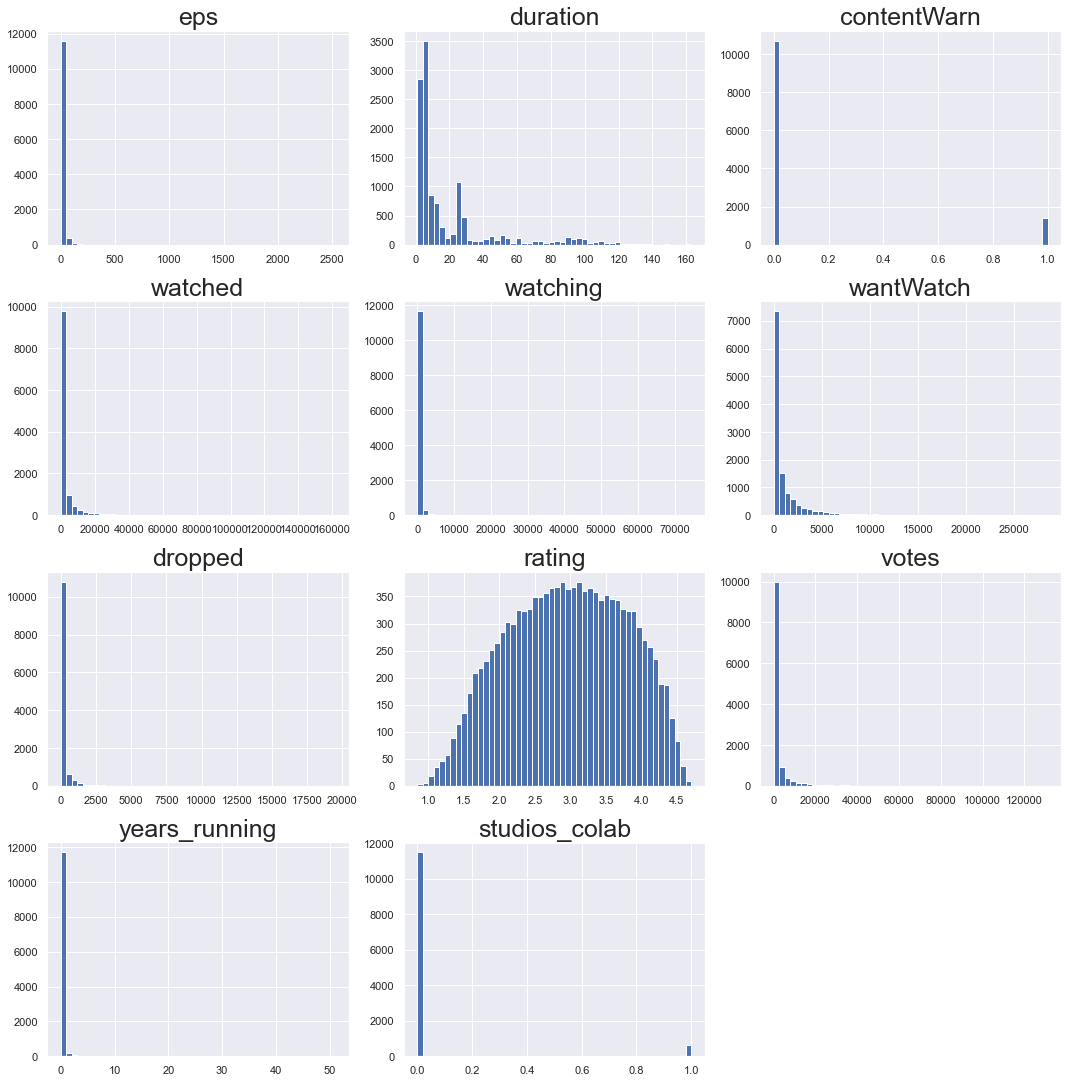

<IPython.core.display.Javascript object>

In [128]:
# creating a list of non-tag columns
dist_cols = [
    item for item in df2.select_dtypes(include=np.number).columns if "tag" not in item
]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df2[dist_cols[i]], bins=50)
    # sns.histplot(data=df2, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* We see that most of the columns have a very skewed distribution.
* **We will apply the log transformation to all but the `contentWarn`, `studios_colab`, and `rating` columns to deal with skewness in the data.**

In [129]:
# creating a copy of the dataframe
df3 = df2.copy()

# removing contentWarn and studios_colab columns as they have only 0 and 1 values
dist_cols.remove("contentWarn")
dist_cols.remove("studios_colab")

# also dropping the rating column as it is almost normally distributed
dist_cols.remove("rating")

<IPython.core.display.Javascript object>

In [130]:
# using log transforms on some columns

for col in dist_cols:
    df3[col + "_log"] = np.log(df3[col] + 1)

# dropping the original columns
df3.drop(dist_cols, axis=1, inplace=True)
df3.head()

,mediaType,ongoing,sznOfRelease,contentWarn,rating,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,studio_primary,studios_colab,eps_log,duration_log,watched_log,watching_log,wantWatch_log,dropped_log,votes_log,years_running_log
0,TV,False,Spring,1,4.702,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bones,0,4.174387,1.386294,11.549335,9.571645,10.158556,7.884953,11.368454,0.693147
1,Movie,False,is_missing,0,4.663,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Others,0,0.693147,4.682131,10.982441,7.282074,9.986633,4.828314,10.691058,0.000000
2,Movie,False,is_missing,1,4.661,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Kyoto Animation,0,0.693147,4.875197,10.734068,6.853299,9.749695,4.890349,10.426825,0.000000
3,TV,False,Fall,0,4.660,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Production I.G,0,2.397895,2.564949,10.132017,7.688913,8.997518,5.123964,9.765546,0.000000
4,TV,False,Spring,1,4.650,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Others,0,2.397895,1.791759,9.966885,8.076515,8.970178,5.164786,9.667132,0.000000


<IPython.core.display.Javascript object>

**Let's check for skewness after applying the log transformation.**

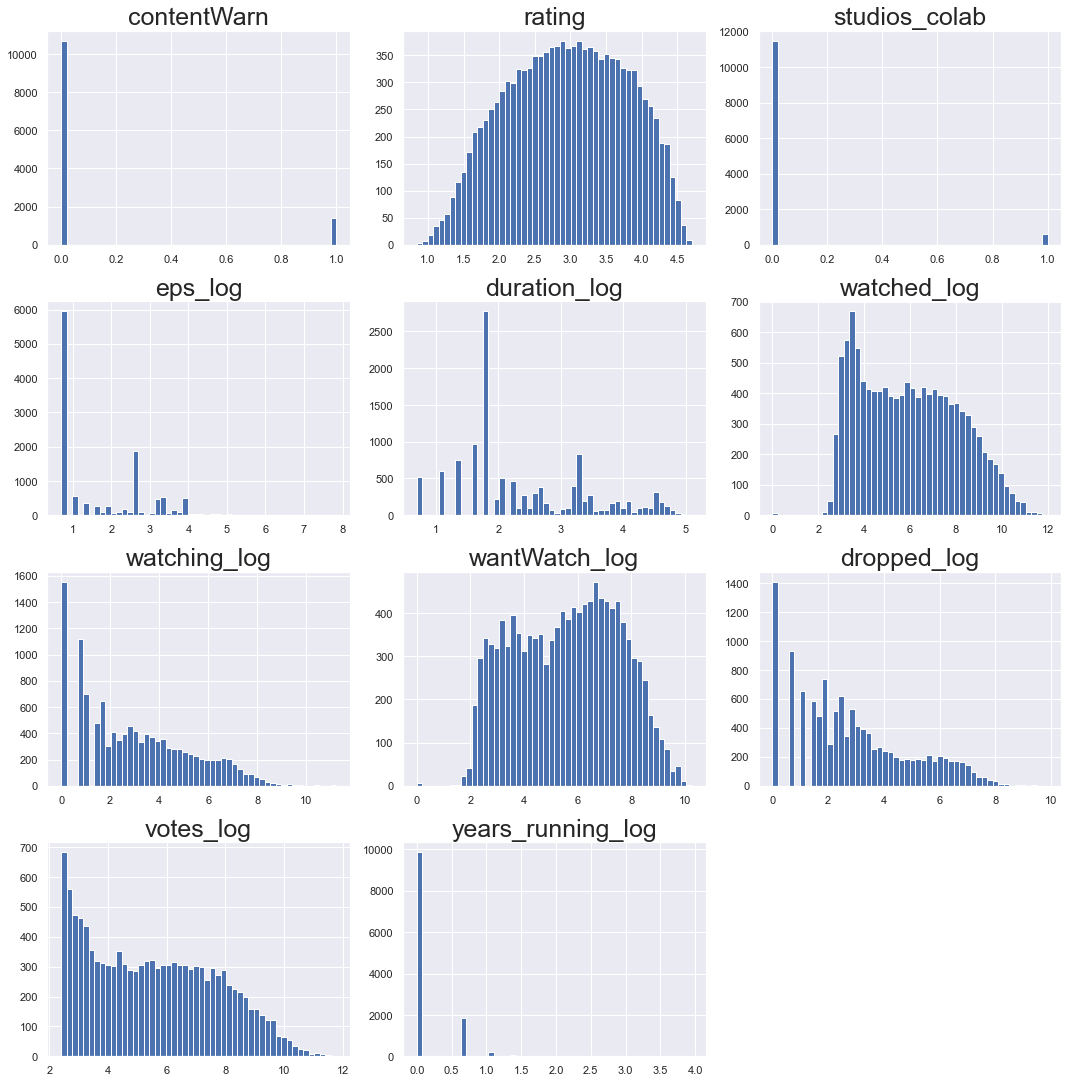

<IPython.core.display.Javascript object>

In [131]:
# creating a list of non-tag columns
dist_cols = [
    item for item in df3.select_dtypes(include=np.number).columns if "tag" not in item
]

# let's plot histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df3[dist_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* The columns are still skewed, but not as heavily as before.

**Let's check for correlations between the columns (other than the tag columns)**

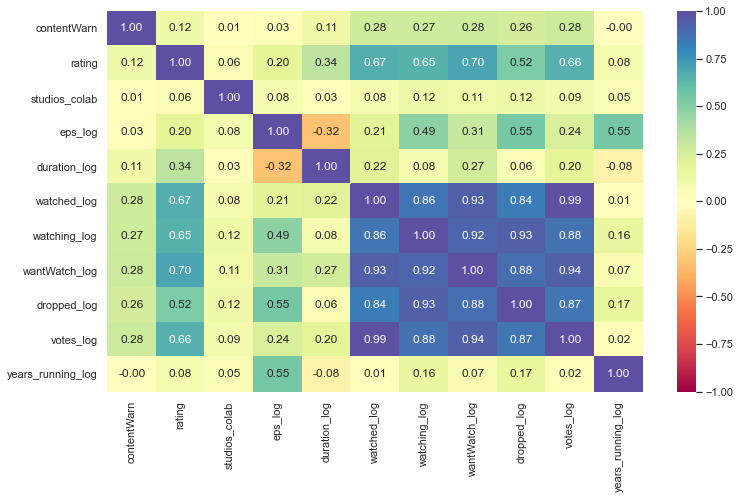

<IPython.core.display.Javascript object>

In [132]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df3[dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are still a few highly correlated columns.

## Model Building

### Define dependent variable

In [133]:
X = df3.drop(["rating"], axis=1)
y = df3["rating"]

<IPython.core.display.Javascript object>

### Creating dummy variables

In [134]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,ongoing,contentWarn,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,studios_colab,eps_log,duration_log,watched_log,watching_log,wantWatch_log,dropped_log,votes_log,years_running_log,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web,sznOfRelease_Spring,sznOfRelease_Summer,sznOfRelease_Winter,sznOfRelease_is_missing,studio_primary_AIC,studio_primary_Bones,studio_primary_DLE,studio_primary_GONZO,studio_primary_J.C. Staff,studio_primary_Kyoto Animation,studio_primary_MADHOUSE,studio_primary_Nippon Animation,studio_primary_OLM,studio_primary_Others,studio_primary_Production I.G,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC
0,False,1,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.174387,1.386294,11.549335,9.571645,10.158556,7.884953,11.368454,0.693147,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.693147,4.682131,10.982441,7.282074,9.986633,4.828314,10.691058,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,False,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.693147,4.875197,10.734068,6.853299,9.749695,4.890349,10.426825,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,False,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.397895,2.564949,10.132017,7.688913,8.997518,5.123964,9.765546,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,False,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.397895,1.791759,9.966885,8.076515,8.970178,5.164786,9.667132,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

### Split the data into train and test

In [135]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [136]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 8470
Number of rows in test data = 3631


<IPython.core.display.Javascript object>

### Fitting a linear model

In [137]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [138]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
ongoing,-0.041814
contentWarn,-0.155074
tag_'Comedy',0.039643
tag_'Based on a Manga',0.079379
tag_'Action',-0.040599
tag_'Fantasy',0.038046
tag_'Sci Fi',0.004071
tag_'Shounen',0.065665
tag_'Family Friendly',-0.018684
tag_'Original Work',-0.016488


<IPython.core.display.Javascript object>

### Coefficient Interpretations

* Coefficients of log of `eps`, log of `duration`, some of the *tag* columns, some of the `sznOfRelease` columns, some of the `studio_primary` columns, etc. are positive.
    - Increase in these will lead to an increase in the rating of an anime.


* Coefficients of `contentWarn`, `studios_colab`, some of the *tag* columns, some of the `mediaType` columns, some of the `studio_primary` columns, etc. are negative.
    - Increase in these will lead to a decrease in the rating of an anime.

### Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function that will print out all the above metrics in one go.

In [139]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [140]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.456805,0.357049,0.694278,0.691619,14.200784


<IPython.core.display.Javascript object>

In [141]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.476857,0.371374,0.669603,0.662823,14.780452


<IPython.core.display.Javascript object>

**Observations**

- The train and test $R^2$ are 0.69 and 0.67, indicating that the model explains 69% and 67% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict anime ratings within a mean error of 0.37 on the test set.

- MAPE of 14.78 on the test data means that we are able to predict within ~15% of the anime rating.

- The overall performance is much better than the model we built in the previous session.

## Conclusions

- We have been able to build a predictive model that can be used by Streamist to predict the rating of an anime with an $R^2$ of 0.692 on the training set.


- Streamist can use this model to predict the anime ratings within a mean error of 0.37 on the test set.


- We found that the logarithm of the number of episodes in the anime and the logarithm of the duration of each episode are some of the factors which tend to increase the rating of an anime.


- We found that content warnings and collaboration between studios are some of the factors which tend to decrease the rating of an anime.


- We improved our linear regression model performance by applying non-linear transformations to some of the attributes.


- Streamist can also explore non-linear models, which might be able to better identify the patterns in the data to predict the anime ratings with even higher accuracy.